In [61]:
import pandas as pd
import matplotlib.pyplot as plt # Matplotlib library to plot the charts
import matplotlib.mlab as mlab
import numpy as np
import seaborn # Library for the statistic data vizualisation
import itertools

In [62]:
soil = pd.read_table("D:\ML Project Soil\Soil_dataset.txt")
soil.head()

Soil_label               Soil_type              Soil_name  \
0           1  Coarse - grained soils    Well-graded gravels   
1           1  Coarse - grained soils  Poorly graded gravels   
2           1  Coarse - grained soils          Silty gravels   
3           1  Coarse - grained soils         Clayey gravels   
4           2  Coarse - grained soils      Well-graded sands   

                     Texture Soil_letter Soil_color  Moisture_content  \
0  Gravel and gravelly soils          GW        Red               5.0   
1  Gravel and gravelly soils          GP        Red               6.3   
2  Gravel and gravelly soils          GM     Yellow               7.6   
3  Gravel and gravelly soils          GC     Yellow               6.8   
4       Sand and sandy soils          SW        Red               2.3   

   Thickness  Friction_angle  
0        3.2              22  
1        4.0              20  
2        2.2              18  
3        1.0              16  
4        5.1              37

In [63]:
df = pd.DataFrame(soil) # Converting data to Panda DataFrame
df.describe() # Description of statistic features

Soil_label  Moisture_content  Thickness  Friction_angle
count   15.000000         15.000000  15.000000       15.000000
mean     2.266667          6.360000   3.446667       24.400000
std      0.961150          7.119972   1.420697        8.287684
min      1.000000          1.000000   1.000000       11.000000
25%      1.500000          3.100000   2.150000       18.500000
50%      2.000000          5.000000   3.200000       22.000000
75%      3.000000          6.600000   4.700000       31.000000
max      4.000000         31.000000   5.400000       37.000000

In [64]:
print(soil.shape)

(15, 9)


In [65]:
print(soil['Soil_name'].unique())

['Well-graded gravels' 'Poorly graded gravels' 'Silty gravels'
 'Clayey gravels' 'Well-graded sands' 'Poorly graded sands' 'Silty sands'
 'Clayey sands' 'Inorganic slits' 'Inorganic clays' 'Organic slits'
 'Organic clays' 'Peat']


In [66]:
print(soil['Soil_type'].unique())

['Coarse - grained soils' 'Fine - grained soils' 'Highly organic soils']


In [67]:
print(soil.groupby('Soil_name').size())

Soil_name
Clayey gravels           1
Clayey sands             1
Inorganic clays          2
Inorganic slits          2
Organic clays            1
Organic slits            1
Peat                     1
Poorly graded gravels    1
Poorly graded sands      1
Silty gravels            1
Silty sands              1
Well-graded gravels      1
Well-graded sands        1
dtype: int64


In [68]:
print(soil.groupby('Soil_type').size())

Soil_type
Coarse - grained soils    8
Fine - grained soils      6
Highly organic soils      1
dtype: int64


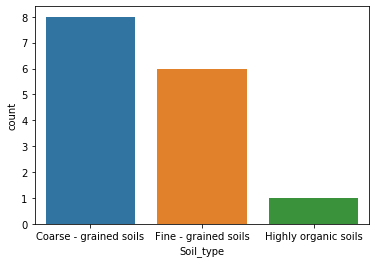

In [69]:
import seaborn as sns
sns.countplot(soil['Soil_type'],label="Count")
plt.show()

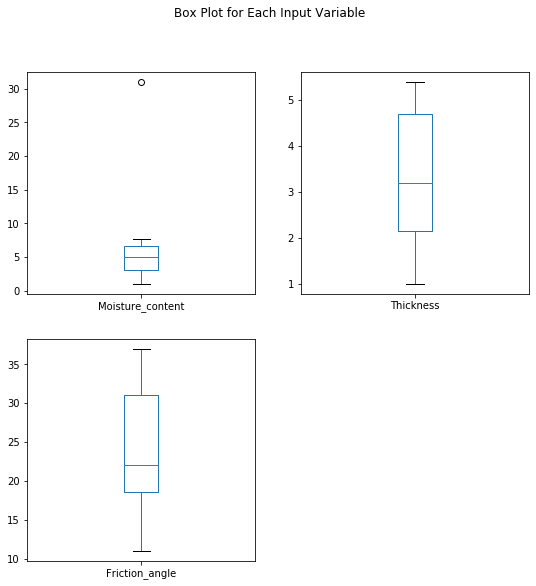

In [70]:
soil.drop('Soil_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for Each Input Variable')
plt.savefig('Soil_box')
plt.show()


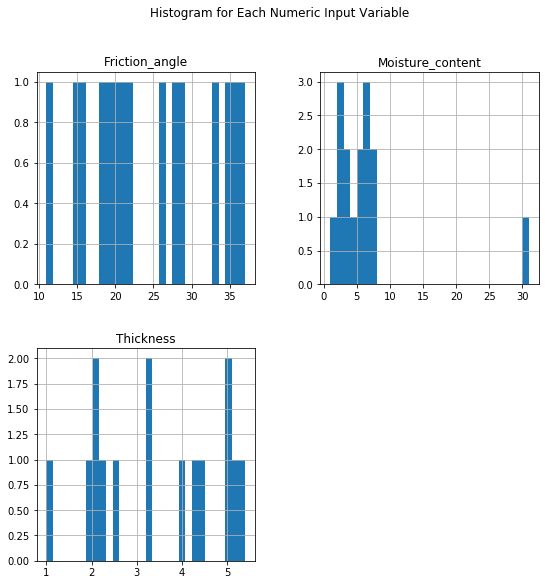

In [71]:
import pylab as pl
soil.drop('Soil_label' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for Each Numeric Input Variable")
plt.savefig('Soil_hist')
plt.show()

In [72]:
#Support Vector Machine
feature_names = ['Moisture_content', 'Thickness', 'Friction_angle']
X = soil[feature_names]
y = soil['Soil_label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.64
Accuracy of SVM classifier on test set: 0.50


In [73]:
#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.64
Accuracy of K-NN classifier on test set: 0.25


In [74]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))



Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 0.50


In [75]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.55
Accuracy of Logistic regression classifier on test set: 0.50


In [76]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.25


In [77]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1 0 0]
 [1 0 0]
 [2 0 0]]
              precision    recall  f1-score   support

           1       0.25      1.00      0.40         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.25         4
   macro avg       0.08      0.33      0.13         4
weighted avg       0.06      0.25      0.10         4



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)


In [79]:
# Function to plot the confusion Matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    class_names=np.array(['0','1']) # Binary label, Class = 1 (fraud) and Class = 0 (no fraud)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [80]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)
classifier.fit(X_train, y_train) # Then we train our model, with our balanced data train

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

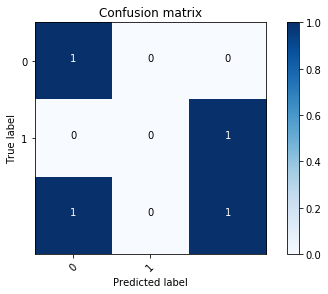

In [81]:
prediction_SVM_all = classifier.predict(X_test) #And finally, we predict our data test.
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)